In [96]:
# ! pip install umap-learn

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns
import umap.umap_ as umap
from sklearn.svm import SVC
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import time 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Data prep

In [4]:
5288 / 247

21.408906882591094

0 - healthy, 1 - sick

In [8]:
first_column_name = df.columns[0]
first_column_name

'Unnamed: 0'

In [9]:
bio = pd.merge(data, df_2, on='index')
bio.rename(columns={'index': 'observation'}, inplace=True)

# Baseline

In [19]:
X = bio.drop(['observation', 'Sample_type'], axis=1)  
y = bio['Sample_type']

In [20]:
X = X.astype(int)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.95      0.95      0.95        19

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



# Dimensionality reduction

## PCA

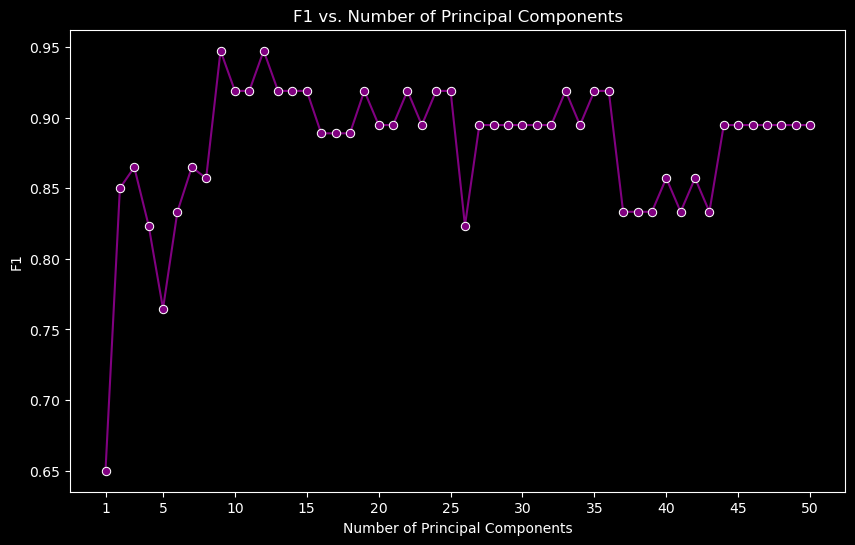

In [24]:
f1_scores = []  

n_components_range = range(1, 51)

for n_components in n_components_range:
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    gbm_pca = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gbm_pca.fit(X_train_pca, y_train)

    y_pred_pca = gbm_pca.predict(X_test_pca)

    f1_pca = f1_score(y_test, y_pred_pca)  
    f1_scores.append(f1_pca) 

sns.set_style(rc={'axes.facecolor': 'black', 'figure.facecolor': 'black', 'axes.edgecolor': 'white', 'xtick.color': 'white', 'ytick.color': 'white', 'text.color': 'white'})

plt.figure(figsize=(10, 6))
sns.lineplot(x=n_components_range, y=f1_scores, marker='o', color='purple')
plt.title('F1 vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('F1')
plt.grid(False)  

custom_ticks = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
plt.xticks(custom_ticks)

plt.show()

## t-SNE

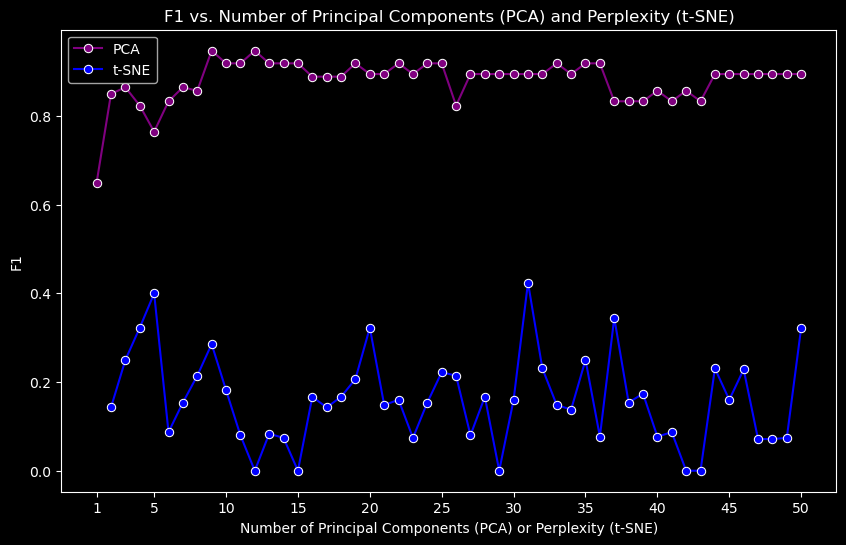

In [56]:
f1_scores_tsne = []
perplexity_range = range(2, 51)

for perplexity in perplexity_range:
    tsne = TSNE(n_components=2, method='exact', perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X)
    
    X_train_tsne = X_tsne[:len(X_train)]
    X_test_tsne = X_tsne[len(X_train):]

    gbm_tsne = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gbm_tsne.fit(X_train_tsne, y_train)

    y_pred_tsne = gbm_tsne.predict(X_test_tsne)

    f1_score_tsne = f1_score(y_test, y_pred_tsne)
    f1_scores_tsne.append(f1_score_tsne)

plt.figure(figsize=(10, 6))
sns.lineplot(x=n_components_range, y=f1_scores_pca, marker='o', color='purple', label='PCA')
sns.lineplot(x=perplexity_range, y=f1_scores_tsne, marker='o', color='blue', label='t-SNE')
plt.title('F1 vs. Number of Principal Components (PCA) and Perplexity (t-SNE)')
plt.xlabel('Number of Principal Components (PCA) or Perplexity (t-SNE)')
plt.ylabel('F1')
plt.grid(False)  

custom_ticks = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
plt.xticks(custom_ticks)

plt.legend()
plt.show()

## UMAP

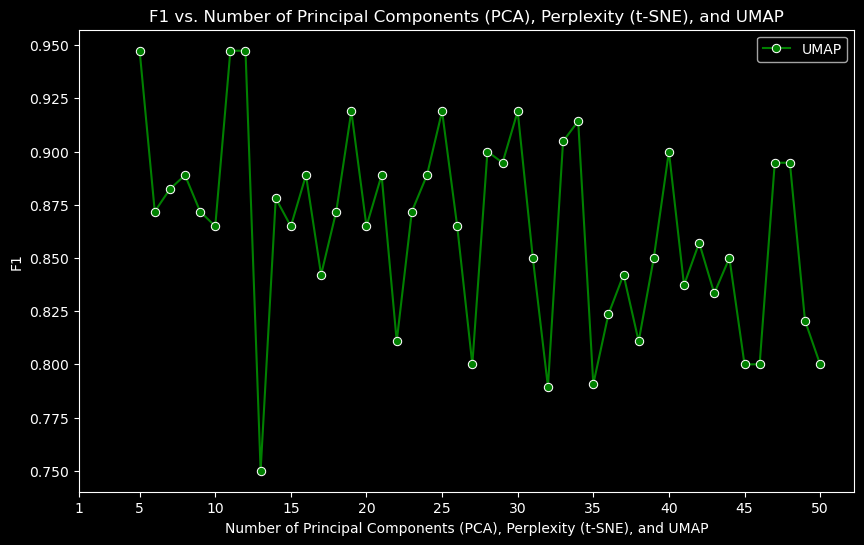

In [57]:
n_neighbors_range = range(5, 51)
f1_scores_umap = []
for n_neighbors in n_neighbors_range:
    
    reducer = umap.UMAP(n_neighbors=n_neighbors, n_components=2, metric='euclidean')
    X_umap = reducer.fit_transform(X)

    X_train_umap, X_test_umap, _, _ = train_test_split(X_umap, y, test_size=0.2, random_state=42)
    gbm_umap = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gbm_umap.fit(X_train_umap, y_train)

    y_pred_umap = gbm_umap.predict(X_test_umap)

    f1_score_umap = f1_score(y_test, y_pred_umap)
    f1_scores_umap.append(f1_score_umap)


plt.figure(figsize=(10, 6))

sns.lineplot(x=n_neighbors_range, y=f1_scores_umap, marker='o', color='green', label='UMAP')
plt.title('F1 vs. Number of Principal Components (PCA), Perplexity (t-SNE), and UMAP')
plt.xlabel('Number of Principal Components (PCA), Perplexity (t-SNE), and UMAP')
plt.ylabel('F1')
plt.grid(False)

custom_ticks = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
plt.xticks(custom_ticks)

plt.legend()
plt.show()

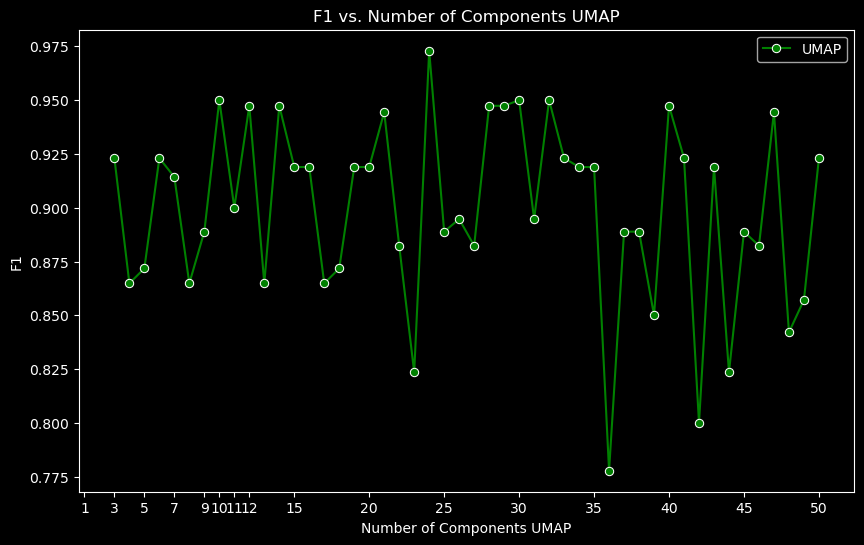

In [59]:
f1_scores_umap = []
n_components_range = range(3, 51)
for n_components in n_components_range:
    
    reducer = umap.UMAP(n_neighbors=11, n_components=n_components, metric='euclidean')
    X_umap = reducer.fit_transform(X)


    
    X_train_umap, X_test_umap, _, _ = train_test_split(X_umap, y, test_size=0.2, random_state=42)


    gbm_umap = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gbm_umap.fit(X_train_umap, y_train)

 
    y_pred_umap = gbm_umap.predict(X_test_umap)

  
    f1_score_umap = f1_score(y_test, y_pred_umap)
    f1_scores_umap.append(f1_score_umap)


plt.figure(figsize=(10, 6))

sns.lineplot(x=n_components_range, y=f1_scores_umap, marker='o', color='green', label='UMAP')
plt.title('F1 vs. Number of Components UMAP')
plt.xlabel('Number of Components UMAP')
plt.ylabel('F1')
plt.grid(False) 

custom_ticks = [1, 3, 5, 7, 9, 10, 11, 12, 15, 20, 25, 30, 35, 40, 45, 50]
plt.xticks(custom_ticks)

plt.legend()
plt.show()

## All methods

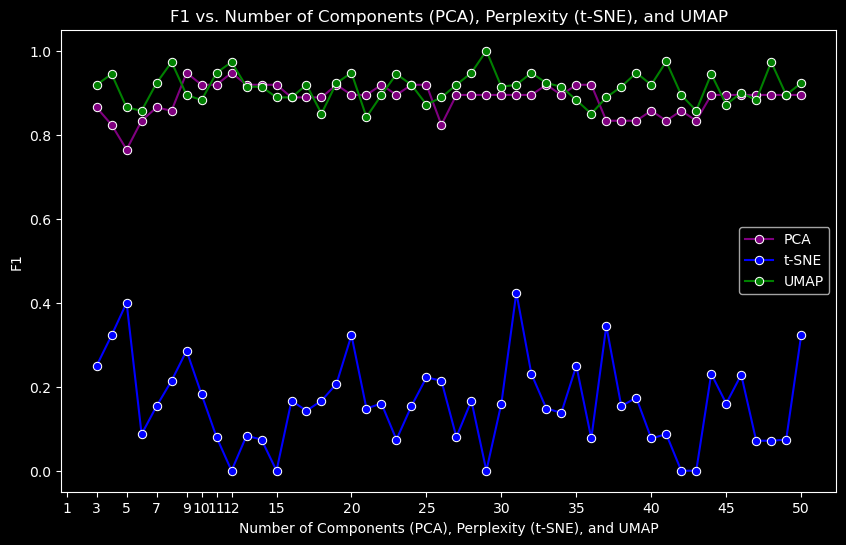

In [60]:
f1_scores_pca = []
f1_scores_tsne = []
f1_scores_umap = []

n_components_range = range(3, 51)
perplexity_range = range(3, 51)
n_components_range_umap = range(3, 51)




for n_components in n_components_range:
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    gbm_pca = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gbm_pca.fit(X_train_pca, y_train)

    y_pred_pca = gbm_pca.predict(X_test_pca)

    f1_score_pca = f1_score(y_test, y_pred_pca)
    f1_scores_pca.append(f1_score_pca)



for perplexity in perplexity_range:
    tsne = TSNE(n_components=2, method='exact', perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X)
    
    X_train_tsne = X_tsne[:len(X_train)]
    X_test_tsne = X_tsne[len(X_train):]

    gbm_tsne = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gbm_tsne.fit(X_train_tsne, y_train)

    y_pred_tsne = gbm_tsne.predict(X_test_tsne)

    f1_score_tsne = f1_score(y_test, y_pred_tsne)
    f1_scores_tsne.append(f1_score_tsne)

for n_components_umap in n_components_range_umap:
    reducer = umap.UMAP(n_neighbors=11, n_components=n_components_umap, metric='euclidean')
    X_umap = reducer.fit_transform(X)

    X_train_umap, X_test_umap, _, _ = train_test_split(X_umap, y, test_size=0.2, random_state=42)

    gbm_umap = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gbm_umap.fit(X_train_umap, y_train)

    y_pred_umap = gbm_umap.predict(X_test_umap)

    f1_score_umap = f1_score(y_test, y_pred_umap)
    f1_scores_umap.append(f1_score_umap)


plt.figure(figsize=(10, 6))

sns.lineplot(x=n_components_range, y=f1_scores_pca, marker='o', color='purple', label='PCA')
sns.lineplot(x=perplexity_range, y=f1_scores_tsne, marker='o', color='blue', label='t-SNE')
sns.lineplot(x=n_components_range_umap, y=f1_scores_umap, marker='o', color='green', label='UMAP')

plt.title('F1 vs. Number of Components (PCA), Perplexity (t-SNE), and UMAP')
plt.xlabel('Number of Components (PCA), Perplexity (t-SNE), and UMAP')
plt.ylabel('F1')
plt.grid(False)

custom_ticks = [1, 3, 5, 7, 9, 10, 11, 12, 15, 20, 25, 30, 35, 40, 45, 50]
plt.xticks(custom_ticks)

plt.legend()
plt.show()

In [25]:
# UMAP
reducer = umap.UMAP(n_neighbors=11, n_components=30, metric='euclidean')
X_umap = reducer.fit_transform(X)
X_train_umap, X_test_umap, y_train, y_test = train_test_split(X_umap, y, test_size=0.2, random_state=42)
gbm_umap = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_umap.fit(X_train_umap, y_train)
y_pred_umap = gbm_umap.predict(X_test_umap)
print(classification_report(y_test, y_pred_umap))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.95      0.95      0.95        19

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [26]:
# PCA
pca = PCA(n_components=9)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

gbm_pca = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_pca.fit(X_train_pca, y_train)

y_pred_pca = gbm_pca.predict(X_test_pca)
print(classification_report(y_test, y_pred_pca))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.95      0.95      0.95        19

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.95      0.95      0.95        19

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



Таким образом, UMAP с числом соседей в 11 и числом компонент в 30 является оптимальным значением

# ML algorithms comparison

In [33]:
reducer = umap.UMAP(n_neighbors=11, n_components=30, metric='euclidean')
X_umap = reducer.fit_transform(X)

In [49]:
algorithms = [
    (GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42), "Gradient Boosting"),
    (SVC(kernel='linear', C=1.0, random_state=42), "Support Vector Machine"),
    (LogisticRegression(solver='liblinear', random_state=42), "Logistic Regression"),
    (RandomForestClassifier(n_estimators=100, random_state=42), "Random Forest"),
    (KNeighborsClassifier(n_neighbors=5), "K-Nearest Neighbors"),
    (GaussianNB(), "Naive Bayes"),
    (DecisionTreeClassifier(random_state=42), "Decision Tree"),
    (AdaBoostClassifier(n_estimators=50, random_state=42), "AdaBoost"),
    (BaggingClassifier(n_estimators=100, random_state=42), "Bagging"),
    (ExtraTreesClassifier(n_estimators=100, random_state=42), "Extra Trees"),
    (XGBClassifier(n_estimators=100, random_state=42), "XGBoost"),
    (LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42), "LightGBM")
]


for model, model_name in algorithms:
    model.fit(X_umap, y)
    cross_val_scores = cross_val_score(model, X_umap, y, cv=5)
    print(f"{model_name} - Mean CV Score: {round(cross_val_scores.mean(), 3)}")

Gradient Boosting - Mean CV Score: 0.825
Support Vector Machine - Mean CV Score: 0.707
Logistic Regression - Mean CV Score: 0.679
Random Forest - Mean CV Score: 0.796
K-Nearest Neighbors - Mean CV Score: 0.752
Naive Bayes - Mean CV Score: 0.695
Decision Tree - Mean CV Score: 0.804
AdaBoost - Mean CV Score: 0.813
Bagging - Mean CV Score: 0.809
Extra Trees - Mean CV Score: 0.796
XGBoost - Mean CV Score: 0.772
LightGBM - Mean CV Score: 0.776


# Model tuning

In [68]:
param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2, 0.3, 0.4],
    "max_depth": [1, 2, 3, 4, 5, 6],
    "subsample": [0.6, 0.7, 0.8, 0.9, 1.0]
}


cv = KFold(n_splits=5, random_state=100, shuffle=True)

oof = np.zeros(len(y)) 
train_preds = np.zeros(len(y))  
models = []

for fold_, (train_idx, val_idx) in enumerate(cv.split(X_umap, y), 1):
    print(f"Training with fold {fold_} started")

    model = GradientBoostingClassifier(random_state=42)

    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)

    train_X, val_X = X_umap[train_idx], X_umap[val_idx]
    train_y, val_y = y[train_idx], y[val_idx]

    start_time = time.time()

    grid_search.fit(train_X, train_y)

    end_time = time.time()

    oof[val_idx] = grid_search.predict_proba(val_X)[:, 1]
    train_preds[train_idx] += grid_search.predict_proba(train_X)[:, 1] / (cv.n_splits - 1)

    models.append(grid_search)

    print(f"Training with fold {fold_} completed in {end_time - start_time:.2f} seconds")


best_params = models[0].best_params_
best_model = models[0]
print("Best Hyperparameters:", best_params)

Training with fold 1 started
Training with fold 1 completed in 115.47 seconds
Training with fold 2 started
Training with fold 2 completed in 105.14 seconds
Training with fold 3 started
Training with fold 3 completed in 105.15 seconds
Training with fold 4 started
Training with fold 4 completed in 105.71 seconds
Training with fold 5 started
Training with fold 5 completed in 104.80 seconds
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50, 'subsample': 1.0}


In [71]:
from sklearn.model_selection import GridSearchCV, KFold
import numpy as np
import lightgbm as lgb


param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2, 0.3, 0.4],
    "max_depth": [1, 2, 3, 4, 5, 6],
    "subsample": [0.6, 0.7, 0.8, 0.9, 1.0]
}


# Define KFold cross-validation
cv = KFold(n_splits=5, random_state=100, shuffle=True)

oof = np.zeros(len(y))  # Change this to your target variable name
train_preds = np.zeros(len(y))  # Change this to your target variable name
best_score = 0
best_model = None
best_params = None

# Iterate through each fold
for fold_, (train_idx, val_idx) in enumerate(cv.split(X_umap, y), 1):
    print(f"Training with fold {fold_} started")

    # Create a GradientBoostingClassifier model
    model = GradientBoostingClassifier(random_state=42)

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)

    # Split the data into training and validation sets
    train_X, val_X = X_umap[train_idx], X_umap[val_idx]
    train_y, val_y = y[train_idx], y[val_idx]

    start_time = time.time()

    # Fit the model with GridSearchCV
    grid_search.fit(train_X, train_y)

    end_time = time.time()

    # Store out-of-fold predictions and training predictions
    oof[val_idx] = grid_search.predict_proba(val_X)[:, 1]
    train_preds[train_idx] += grid_search.predict_proba(train_X)[:, 1] / (cv.n_splits - 1)

    # Keep track of the best model with the highest cross-validation score
    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_

    print(f"Training with fold {fold_} completed in {end_time - start_time:.2f} seconds")

# You can access the best hyperparameters and best_model for further analysis
print("Best Hyperparameters:", best_params)
print("Best Mean CV Score:", round(best_score, 3))

Training with fold 1 started
Training with fold 1 completed in 122.92 seconds
Training with fold 2 started
Training with fold 2 completed in 123.81 seconds
Training with fold 3 started
Training with fold 3 completed in 125.07 seconds
Training with fold 4 started
Training with fold 4 completed in 141.52 seconds
Training with fold 5 started
Training with fold 5 completed in 140.97 seconds
Best Hyperparameters: {'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 50, 'subsample': 1.0}
Best Mean CV Score: 0.847


In [89]:
models[4].best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}

In [ ]:
reducer = umap.UMAP(n_neighbors=11, n_components=30, metric='euclidean')
X_umap = reducer.fit_transform(X)
X_train_umap, X_test_umap, _, _ = train_test_split(X_umap, y, test_size=0.2, random_state=42)

In [ ]:
gbm_umap = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=6, random_state=42)
gbm_umap.fit(X_train_umap, y_train)
y_pred_umap = gbm_umap.predict(X_test_umap)
print(classification_report(y_test, y_pred_umap))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        31
           1       0.89      0.84      0.86        19

    accuracy                           0.90        50
   macro avg       0.90      0.89      0.89        50
weighted avg       0.90      0.90      0.90        50



In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.95      0.95      0.95        19

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



---